In [1]:
# import pandas as pd
import numpy as np
import os
import mplcursors
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = 'grey'

In [2]:
import pandas as pd
import os

folder = "stock_market_data/"
files = os.listdir(folder)

dataframes = []

for file in files:
    df = pd.read_csv(os.path.join(folder, file))
    dataframes.append(df)

df = pd.concat(dataframes, ignore_index=True)

#The warning happened because I'm concatenating empty file, meaning there's a file that's empty in the path above.

PermissionError: [Errno 13] Permission denied: 'stock_market_data/clean_data'

In [ ]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Company Name,Industry,ISIN Code
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366.0,2.687719e+15,NaN,9859619.0,0.3612,NaN,NaN,NaN
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338.0,4.312765e+14,NaN,1453278.0,0.3172,NaN,NaN,NaN
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121.0,4.550658e+14,NaN,1069678.0,0.2088,NaN,NaN,NaN
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762.0,4.283257e+14,NaN,1260913.0,0.2735,NaN,NaN,NaN
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470.0,2.875200e+14,NaN,816123.0,0.2741,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470434 entries, 0 to 470433
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                470384 non-null  object 
 1   Symbol              470434 non-null  object 
 2   Series              470434 non-null  object 
 3   Prev Close          470384 non-null  float64
 4   Open                470384 non-null  float64
 5   High                470384 non-null  float64
 6   Low                 470384 non-null  float64
 7   Last                470384 non-null  float64
 8   Close               470384 non-null  float64
 9   VWAP                470384 non-null  float64
 10  Volume              470384 non-null  float64
 11  Turnover            470384 non-null  float64
 12  Trades              240688 non-null  float64
 13  Deliverable Volume  438230 non-null  float64
 14  %Deliverble         438230 non-null  float64
 15  Company Name        50 non-null   

In [ ]:
df.drop(columns=['Company Name', 'Industry', 'ISIN Code'], inplace=True)

In [ ]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366.0,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338.0,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121.0,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762.0,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470.0,2.875200e+14,NaN,816123.0,0.2741


In [ ]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,470384.000000,470384.000000,470384.000000,470384.000000,470384.000000,470384.000000,470384.000000,4.703840e+05,4.703840e+05,2.406880e+05,4.382300e+05,438230.000000
mean,1266.196349,1267.759708,1286.581440,1247.488465,1266.388302,1266.554351,1267.132300,3.045903e+06,1.610138e+14,6.196427e+04,1.315098e+06,0.502997
std,2581.367576,2585.256861,2619.646432,2546.618689,2581.389799,2582.138197,2582.697234,7.333973e+06,3.298082e+14,6.866443e+04,2.831667e+06,0.190019
min,0.000000,8.500000,9.750000,8.500000,9.100000,9.150000,9.210000,3.000000e+00,1.047000e+07,1.100000e+01,5.000000e+00,0.023600
25%,274.300000,275.000000,279.500000,269.600000,274.400000,274.350000,274.697500,2.190095e+05,1.612816e+13,2.183400e+04,1.253825e+05,0.364700
50%,566.500000,567.025000,576.900000,556.500000,567.000000,566.700000,566.940000,1.010938e+06,6.832603e+13,4.406800e+04,5.017560e+05,0.511000
75%,1242.200000,1243.312500,1263.000000,1221.650000,1242.900000,1242.400000,1242.662500,3.019851e+06,1.863835e+14,7.893550e+04,1.452238e+06,0.638400
max,32861.950000,33399.950000,33480.000000,32468.100000,32849.000000,32861.950000,32975.240000,4.810589e+08,3.564334e+16,1.643015e+06,2.325307e+08,1.000000


In [ ]:
df[df['Prev Close'].apply(lambda x: True if x == 0 else False)]

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
25572,2002-02-18,BHARTI,EQ,0.0,51.9,51.9,43.5,44.7,44.35,46.0,10381190.0,4.775431e+13,NaN,6503775.0,0.6265
179072,2002-02-18,BHARTI,EQ,0.0,51.9,51.9,43.5,44.7,44.35,46.0,10381190.0,4.775431e+13,NaN,6503775.0,0.6265


In [ ]:
df.drop(index=[25572, 179072], axis=1, inplace=True)

In [ ]:
df[df['Prev Close'].apply(lambda x: True if x == 0 else False)]

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble


In [ ]:
df[df.duplicated()]

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
153501,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338.0,4.312765e+14,NaN,1453278.0,0.3172
153503,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762.0,4.283257e+14,NaN,1260913.0,0.2735
153504,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470.0,2.875200e+14,NaN,816123.0,0.2741
153505,2007-12-04,MUNDRAPORT,EQ,969.30,985.00,1056.00,976.00,1049.00,1041.45,1015.39,4849250.0,4.923867e+14,NaN,1537667.0,0.3171
153506,2007-12-05,MUNDRAPORT,EQ,1041.45,1061.00,1099.50,1050.00,1084.00,1082.45,1082.79,2848209.0,3.084010e+14,NaN,904260.0,0.3175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470428,2021-04-23,ZEEL,EQ,192.30,192.00,193.00,187.00,188.00,188.00,190.04,8529439.0,1.620902e+14,60790.0,2148300.0,0.2519
470429,2021-04-26,ZEEL,EQ,188.00,190.60,191.10,185.10,186.70,186.40,187.35,8542755.0,1.600451e+14,52374.0,2340188.0,0.2739
470431,2021-04-28,ZEEL,EQ,188.15,188.80,190.60,187.10,188.95,189.10,188.85,8429439.0,1.591917e+14,44056.0,2413974.0,0.2864
470432,2021-04-29,ZEEL,EQ,189.10,190.80,191.65,186.00,186.60,186.55,187.44,9483009.0,1.777471e+14,60932.0,2744472.0,0.2894


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().any()

np.False_

In [ ]:
df[df['Trades'].isna()]['Symbol'].unique()

array(['MUNDRAPORT', 'ASIANPAINT', 'UTIBANK', 'AXISBANK', 'BAJAJ-AUTO',
       'BAJAJFINSV', 'BAJAUTOFIN', 'BAJFINANCE', 'BHARTI', 'BHARTIARTL',
       'BPCL', 'BRITANNIA', 'CIPLA', 'COALINDIA', 'DRREDDY', 'EICHERMOT',
       'GAIL', 'GRASIM', 'HCLTECH', 'HDFC', 'HDFCBANK', 'HEROHONDA',
       'HINDALC0', 'HINDALCO', 'HINDLEVER', 'HINDUNILVR', 'ICICIBANK',
       'INDUSINDBK', 'INFOSYSTCH', 'IOC', 'ITC', 'JSWSTL', 'JSWSTEEL',
       'KOTAKMAH', 'KOTAKBANK', 'LT', 'MARUTI', 'M&M', 'NESTLEIND',
       'NTPC', 'ONGC', 'POWERGRID', 'RELIANCE', 'SBIN', 'SHREECEM',
       'SUNPHARMA', 'TELCO', 'TATAMOTORS', 'TISCO', 'TATASTEEL', 'TCS',
       'TECHM', 'TITAN', 'ULTRACEMCO', 'UNIPHOS', 'SESAGOA', 'WIPRO',
       'ZEETELE', 'ZEEL', 'ADANIPORTS', 'HEROMOTOCO', 'INFRATEL', 'INFY',
       'UPL', 'VEDL'], dtype=object)

In [ ]:
na_symbols = ['MUNDRAPORT', 'ASIANPAINT', 'UTIBANK', 'AXISBANK', 'BAJAJ-AUTO',
       'BAJAJFINSV', 'BAJAUTOFIN', 'BAJFINANCE', 'BHARTI', 'BHARTIARTL',
       'BPCL', 'BRITANNIA', 'CIPLA', 'COALINDIA', 'DRREDDY', 'EICHERMOT',
       'GAIL', 'GRASIM', 'HCLTECH', 'HDFC', 'HDFCBANK', 'HEROHONDA',
       'HINDALC0', 'HINDALCO', 'HINDLEVER', 'HINDUNILVR', 'ICICIBANK',
       'INDUSINDBK', 'INFOSYSTCH', 'IOC', 'ITC', 'JSWSTL', 'JSWSTEEL',
       'KOTAKMAH', 'KOTAKBANK', 'LT', 'MARUTI', 'M&M', 'NESTLEIND',
       'NTPC', 'ONGC', 'POWERGRID', 'RELIANCE', 'SBIN', 'SHREECEM',
       'SUNPHARMA', 'TELCO', 'TATAMOTORS', 'TISCO', 'TATASTEEL', 'TCS',
       'TECHM', 'TITAN', 'ULTRACEMCO', 'UNIPHOS', 'SESAGOA', 'WIPRO',
       'ZEETELE', 'ZEEL', 'ADANIPORTS', 'HEROMOTOCO', 'INFRATEL', 'INFY',
       'UPL', 'VEDL']

df[df['Symbol'].apply(lambda x: True if x in na_symbols else False)]

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366.0,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338.0,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121.0,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762.0,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470.0,2.875200e+14,NaN,816123.0,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470364,2021-01-15,ZEEL,EQ,229.35,229.00,233.60,221.60,224.40,224.90,227.47,18690401.0,4.251452e+14,95946.0,3375281.0,0.1806
470365,2021-01-18,ZEEL,EQ,224.90,225.90,225.90,214.35,217.30,218.00,218.62,13959600.0,3.051789e+14,82803.0,3169265.0,0.2270
470375,2021-02-02,ZEEL,EQ,227.20,228.00,247.70,227.50,244.90,242.90,239.90,31973546.0,7.670447e+14,175793.0,7265817.0,0.2272
470385,2021-02-16,ZEEL,EQ,211.70,213.50,213.75,202.85,206.45,206.10,208.06,22889782.0,4.762391e+14,143366.0,5144308.0,0.2247


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Date'].info()

<class 'pandas.core.series.Series'>
Index: 250371 entries, 0 to 470430
Series name: Date
Non-Null Count   Dtype         
--------------   -----         
250321 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.8 MB


In [ ]:
df['Date'].describe()

count                           250321
mean     2011-06-02 21:19:53.595423232
min                2000-01-03 00:00:00
25%                2006-07-10 00:00:00
50%                2011-08-22 00:00:00
75%                2016-07-13 00:00:00
max                2021-04-30 00:00:00
Name: Date, dtype: object

In [ ]:
df['Symbol'].unique()

array(['MUNDRAPORT', 'ADANIPORTS', 'ASIANPAINT', 'UTIBANK', 'AXISBANK',
       'BAJAJ-AUTO', 'BAJAJFINSV', 'BAJAUTOFIN', 'BAJFINANCE', 'BHARTI',
       'BHARTIARTL', 'BPCL', 'BRITANNIA', 'CIPLA', 'COALINDIA', 'DRREDDY',
       'EICHERMOT', 'GAIL', 'GRASIM', 'HCLTECH', 'HDFC', 'HDFCBANK',
       'HEROHONDA', 'HEROMOTOCO', 'HINDALC0', 'HINDALCO', 'HINDLEVER',
       'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK', 'INFOSYSTCH', 'INFY',
       'IOC', 'ITC', 'JSWSTL', 'JSWSTEEL', 'KOTAKMAH', 'KOTAKBANK', 'LT',
       'MARUTI', 'M&M', 'NESTLEIND', 'NTPC', 'ONGC', 'POWERGRID',
       'RELIANCE', 'SBIN', 'SHREECEM', 'SUNPHARMA', 'TELCO', 'TATAMOTORS',
       'TISCO', 'TATASTEEL', 'TCS', 'TECHM', 'TITAN', 'ULTRACEMCO',
       'UNIPHOS', 'UPL', 'SESAGOA', 'SSLT', 'VEDL', 'WIPRO', 'ZEETELE',
       'ZEEL', 'INFRATEL'], dtype=object)

In [ ]:
df['Symbol'].replace({'MUNDRAPORT': 'ADANIPORTS', 'BAJUTOFIN': 'BAJFINANCE'}, inplace=True)

C:\Users\dlami\AppData\Local\Temp\ipykernel_2800\3863895671.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Symbol'].replace({'MUNDRAPORT': 'ADANIPORTS', 'BAJUTOFIN': 'BAJFINANCE'}, inplace=True)


In [ ]:
symbol_mapping = {
    'UTIBANK': 'AXISBANK',
    'BHARTI': 'BHARTIARTL',
    'INFOSYSTCH': 'INFY',
    'TELCO': 'TATAMOTORS',
    'TISCO': 'TATASTEEL',
    'HEROHONDA': 'HEROMOTOCO',
    'HINDLEVER': 'HINDUNILVR',
    'KOTAKMAH': 'KOTAKBANK',
    'JSWSTL': 'JSWSTEEL',
    'ZEETELE': 'ZEEL',
    'SESAGOA': 'VEDL',
    'SSLT': 'VEDL',
    'INFRATEL': 'BHARTIARTL',   # post-merger, optional
}

df['Symbol'].replace(symbol_mapping, inplace=True)

In [ ]:
df['Symbol'].unique()

array(['ADANIPORTS', 'ASIANPAINT', 'AXISBANK', 'BAJAJ-AUTO', 'BAJAJFINSV',
       'BAJAUTOFIN', 'BAJFINANCE', 'BHARTIARTL', 'BPCL', 'BRITANNIA',
       'CIPLA', 'COALINDIA', 'DRREDDY', 'EICHERMOT', 'GAIL', 'GRASIM',
       'HCLTECH', 'HDFC', 'HDFCBANK', 'HEROMOTOCO', 'HINDALC0',
       'HINDALCO', 'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK', 'INFY', 'IOC',
       'ITC', 'JSWSTEEL', 'KOTAKBANK', 'LT', 'MARUTI', 'M&M', 'NESTLEIND',
       'NTPC', 'ONGC', 'POWERGRID', 'RELIANCE', 'SBIN', 'SHREECEM',
       'SUNPHARMA', 'TATAMOTORS', 'TATASTEEL', 'TCS', 'TECHM', 'TITAN',
       'ULTRACEMCO', 'UNIPHOS', 'UPL', 'VEDL', 'WIPRO', 'ZEEL'],
      dtype=object)

In [ ]:
df['Symbol'].replace({'HINDALC0': 'HINDALCO'}, inplace=True)

In [ ]:
df['Symbol'].unique()

array(['ADANIPORTS', 'ASIANPAINT', 'AXISBANK', 'BAJAJ-AUTO', 'BAJAJFINSV',
       'BAJAUTOFIN', 'BAJFINANCE', 'BHARTIARTL', 'BPCL', 'BRITANNIA',
       'CIPLA', 'COALINDIA', 'DRREDDY', 'EICHERMOT', 'GAIL', 'GRASIM',
       'HCLTECH', 'HDFC', 'HDFCBANK', 'HEROMOTOCO', 'HINDALCO',
       'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK', 'INFY', 'IOC', 'ITC',
       'JSWSTEEL', 'KOTAKBANK', 'LT', 'MARUTI', 'M&M', 'NESTLEIND',
       'NTPC', 'ONGC', 'POWERGRID', 'RELIANCE', 'SBIN', 'SHREECEM',
       'SUNPHARMA', 'TATAMOTORS', 'TATASTEEL', 'TCS', 'TECHM', 'TITAN',
       'ULTRACEMCO', 'UNIPHOS', 'UPL', 'VEDL', 'WIPRO', 'ZEEL'],
      dtype=object)

In [ ]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,ADANIPORTS,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366.0,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,ADANIPORTS,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338.0,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,ADANIPORTS,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121.0,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,ADANIPORTS,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762.0,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,ADANIPORTS,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470.0,2.875200e+14,NaN,816123.0,0.2741


In [ ]:
# Note: All records in this dataset are from the 'EQ' (Equity) series — standard equity shares traded on the exchange.

df.drop('Series', axis='columns', inplace=True)

In [ ]:
df.head()

,Date,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,ADANIPORTS,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366.0,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,ADANIPORTS,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338.0,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,ADANIPORTS,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121.0,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,ADANIPORTS,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762.0,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,ADANIPORTS,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470.0,2.875200e+14,NaN,816123.0,0.2741


# Price Movement & Trends
## How did the closing price evolve over time?

In [ ]:
df.describe()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,250321,250321.000000,250321.000000,250321.000000,250321.000000,250321.000000,250321.000000,250321.000000,2.503210e+05,2.503210e+05,1.281200e+05,2.338680e+05,233868.000000
mean,2011-06-02 21:19:53.595423232,1265.612029,1267.198330,1286.052366,1246.909875,1265.828234,1265.991667,1266.583116,3.065964e+06,1.619968e+14,6.230399e+04,1.311380e+06,0.497708
min,2000-01-03 00:00:00,2.000000,8.500000,9.750000,8.500000,9.100000,9.150000,9.210000,3.000000e+00,1.047000e+07,1.100000e+01,5.000000e+00,0.023600
25%,2006-07-10 00:00:00,273.900000,274.500000,279.000000,269.150000,274.000000,273.950000,274.320000,2.213810e+05,1.628856e+13,2.194225e+04,1.249848e+05,0.364500
50%,2011-08-22 00:00:00,564.500000,565.000000,574.950000,555.000000,565.000000,564.700000,565.030000,1.013641e+06,6.863318e+13,4.426250e+04,4.962955e+05,0.497300
75%,2016-07-13 00:00:00,1240.550000,1241.000000,1260.000000,1220.000000,1240.000000,1240.600000,1240.960000,3.038336e+06,1.875081e+14,7.931150e+04,1.444847e+06,0.631700
max,2021-04-30 00:00:00,32861.950000,33399.950000,33480.000000,32468.100000,32849.000000,32861.950000,32975.240000,4.810589e+08,3.564334e+16,1.643015e+06,2.325307e+08,1.000000
std,NaN,2586.418244,2590.469411,2625.091054,2551.639383,2586.663316,2587.372403,2587.909109,7.323097e+06,3.291232e+14,6.885204e+04,2.807556e+06,0.188086


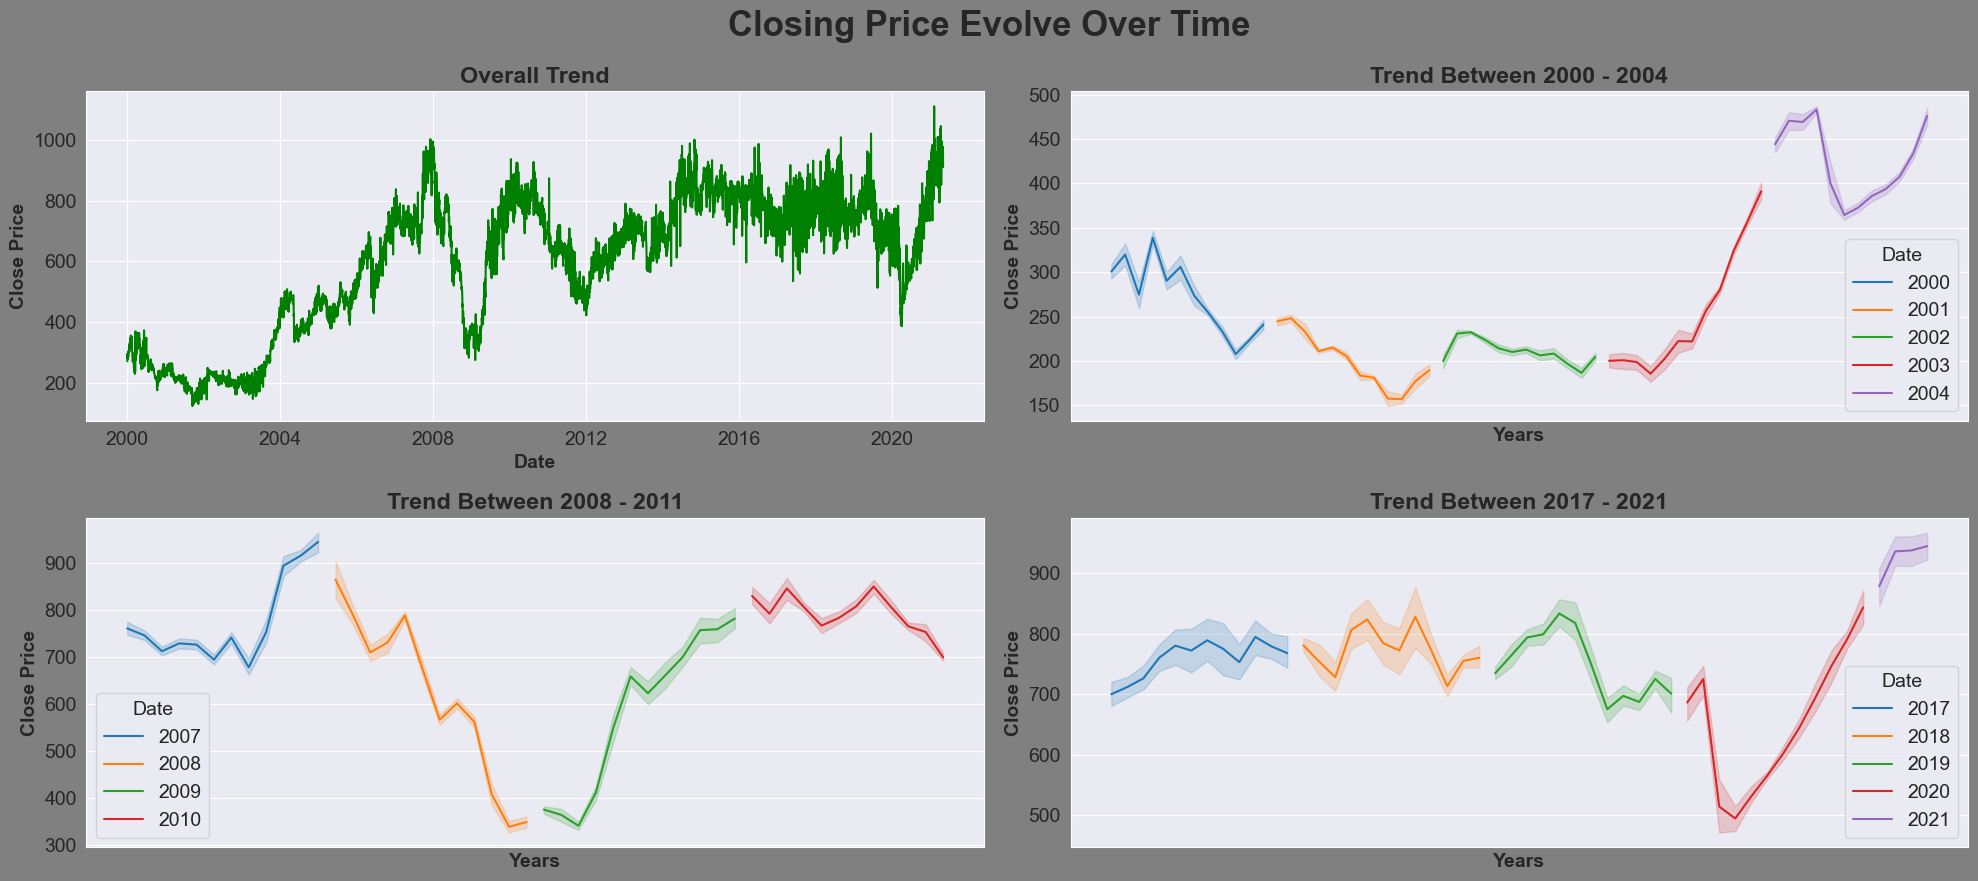

In [ ]:
from datetime import datetime as dt
close_trend = df.groupby('Date')['Close'].median().reset_index()
trend_earl = close_trend[close_trend['Date'].apply(lambda x: True if x < dt(2005, 1, 1) else False)]
trend_mid = close_trend[close_trend['Date'].apply(lambda x: True if x > dt(2007, 1, 1) and x < dt(2011, 1, 1) else False)]
trend_last = close_trend[close_trend['Date'].apply(lambda x: True if x > dt(2017, 1, 1) else False)]



# Overall trend
fig, axes = plt.subplots(2, 2, figsize=(20, 9))
sns.lineplot(x=close_trend.Date, y=close_trend.Close, ax=axes[0, 0], color='green')
axes[0, 0].set_title("Overall Trend", fontweight='bold')
axes[0, 0].set_xlabel("Date", fontweight='bold')
axes[0, 0].set_ylabel('Close Price', fontweight='bold')

# Trend between 2000 to 2004
sns.lineplot(x=trend_earl['Date'].dt.strftime("%Y-%m"), y=trend_earl['Close'], ax=axes[0, 1], hue=trend_earl['Date'].dt.strftime("%Y"))
axes[0, 1].set_xticks([])
axes[0, 1].set_xlabel("Years", fontweight='bold')
axes[0, 1].set_ylabel("Close Price", fontweight='bold')
axes[0, 1].set_title("Trend Between 2000 - 2004", fontweight='bold')


# Trend between 2008 to 2011
sns.lineplot(x=trend_mid['Date'].dt.strftime("%Y-%m"), y=trend_mid['Close'], ax=axes[1, 0], hue=trend_mid['Date'].dt.strftime("%Y"))
axes[1, 0].set_xticks([])
axes[1, 0].set_xlabel("Years", fontweight='bold')
axes[1, 0].set_ylabel("Close Price", fontweight='bold')
axes[1, 0].set_title("Trend Between 2008 - 2011", fontweight='bold')

# Trend between 2017 to 2021
line = sns.lineplot(x=trend_last['Date'].dt.strftime("%Y-%m"), y=trend_last['Close'], ax=axes[1, 1], hue=trend_last['Date'].dt.strftime("%Y"))
axes[1, 1].set_xticks([])
axes[1, 1].set_xlabel("Years", fontweight='bold')
axes[1, 1].set_ylabel("Close Price", fontweight='bold')
axes[1, 1].set_title("Trend Between 2017 - 2021", fontweight='bold')

fig.suptitle("Closing Price Evolve Over Time", fontweight='bold', fontsize=25)
plt.tight_layout()
plt.show()

## What's the daily price range (High - Low) telling us?

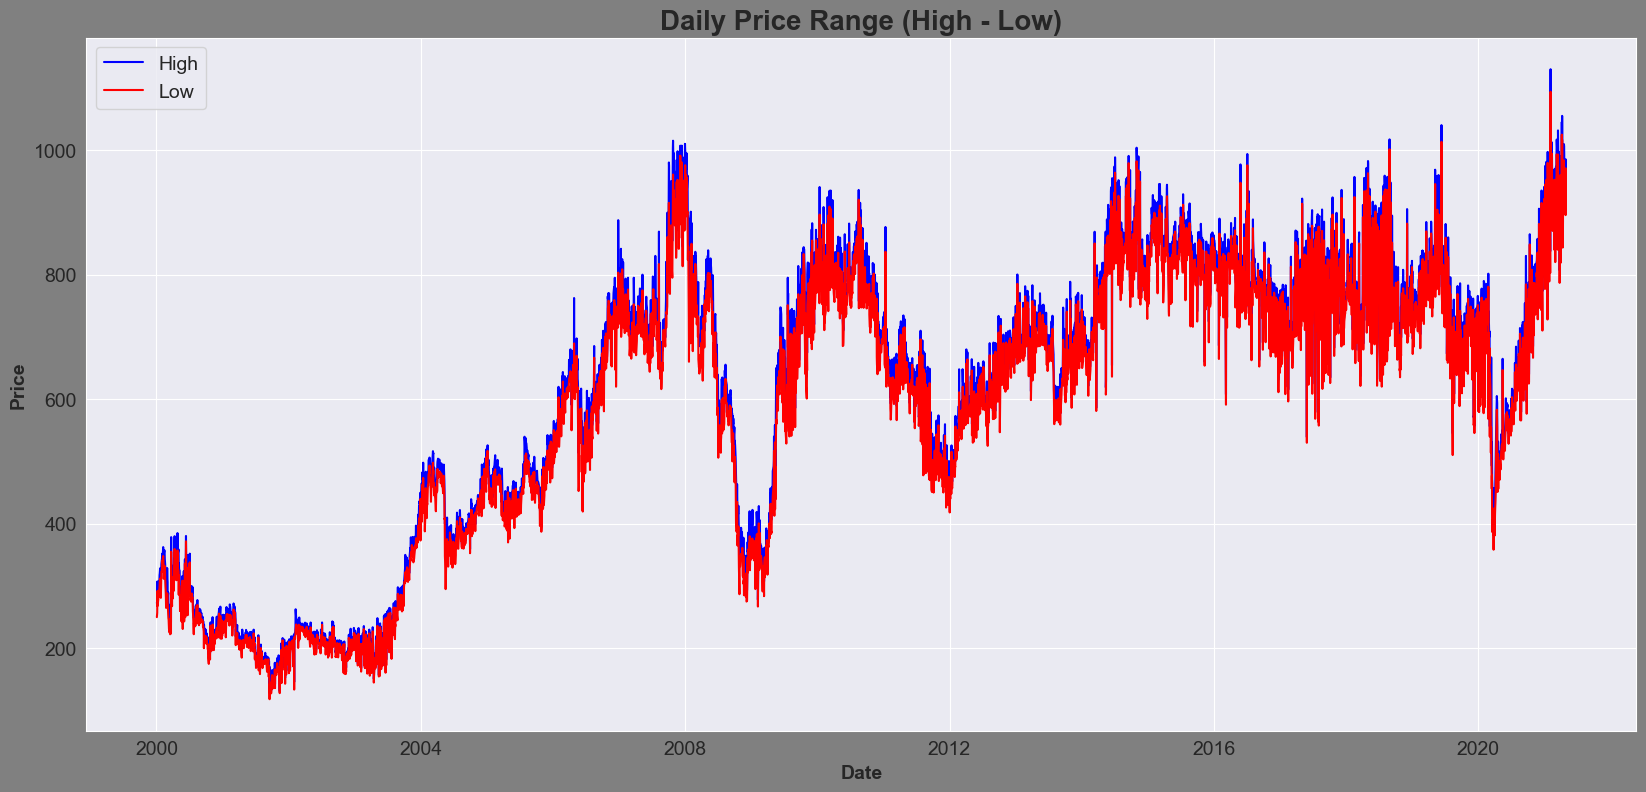

In [ ]:
high_low = df.groupby('Date')[['High', 'Low']].median()
plt.figure(figsize=(20, 9))

line = sns.lineplot(high_low, x=high_low.index, y='High', color='blue', label="High")
sns.lineplot(high_low, x=high_low.index, y='Low', color='red', label='Low')
plt.title("Daily Price Range (High - Low)", fontweight='bold', fontsize=20)
plt.xlabel("Date", fontweight='bold')
plt.ylabel("Price", fontweight='bold')
plt.legend()
plt.show()

## Were there any unusually high price spikes?

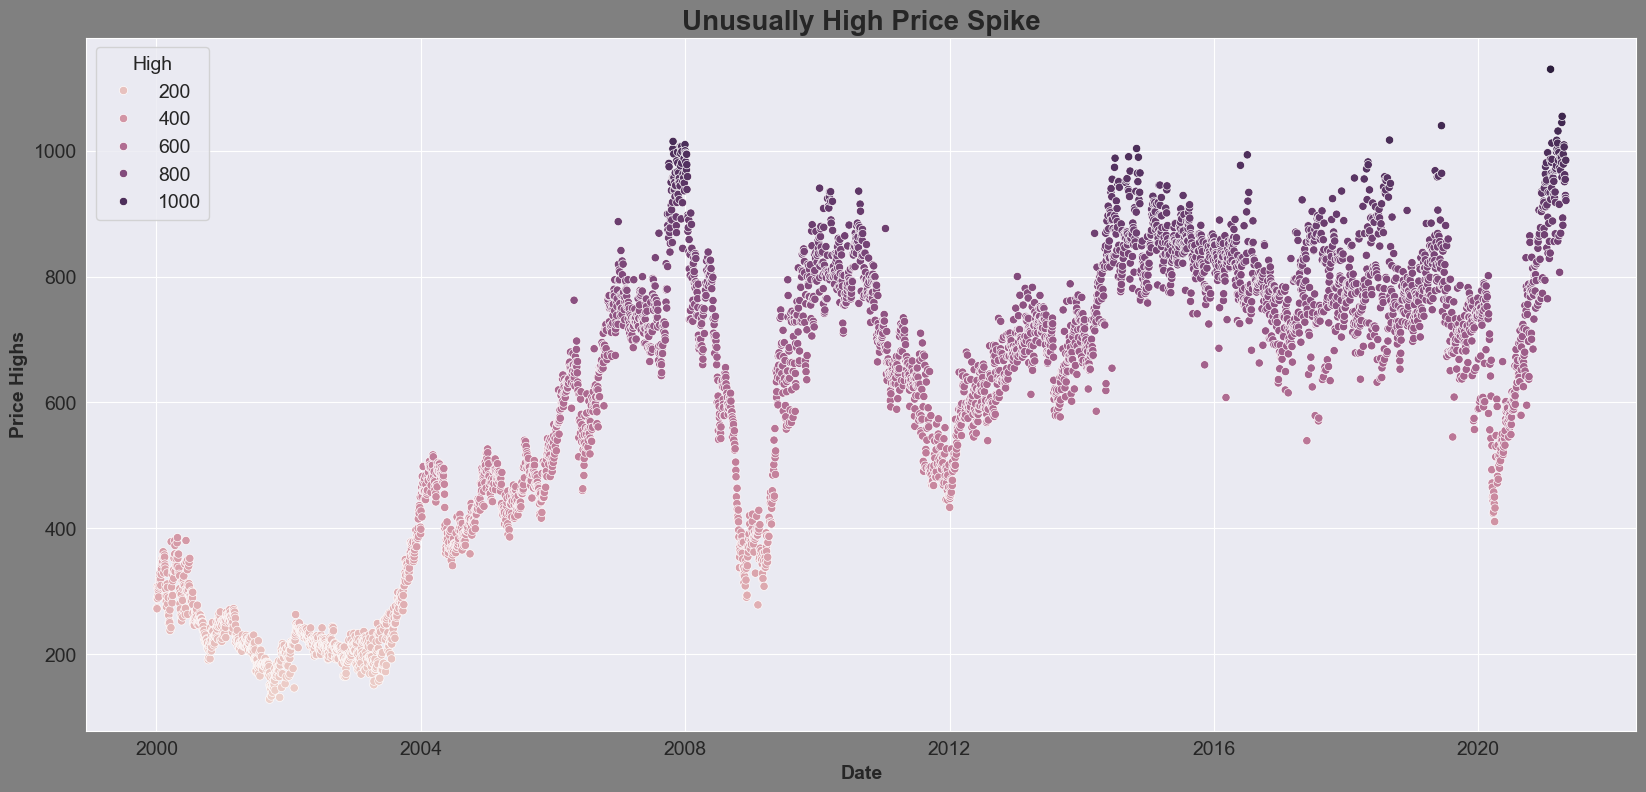

In [ ]:
spike_high = df.groupby('Date')['High'].median().reset_index()

plt.figure(figsize=(20, 9))
sns.scatterplot(spike_high, x='Date', y='High', hue='High')
plt.title("Unusually High Price Spike", fontweight='bold', fontsize=20)
plt.xlabel('Date', fontweight='bold')
plt.ylabel("Price Highs", fontweight='bold')
plt.show()

# Trading Activity
## How does trading volume change over time?

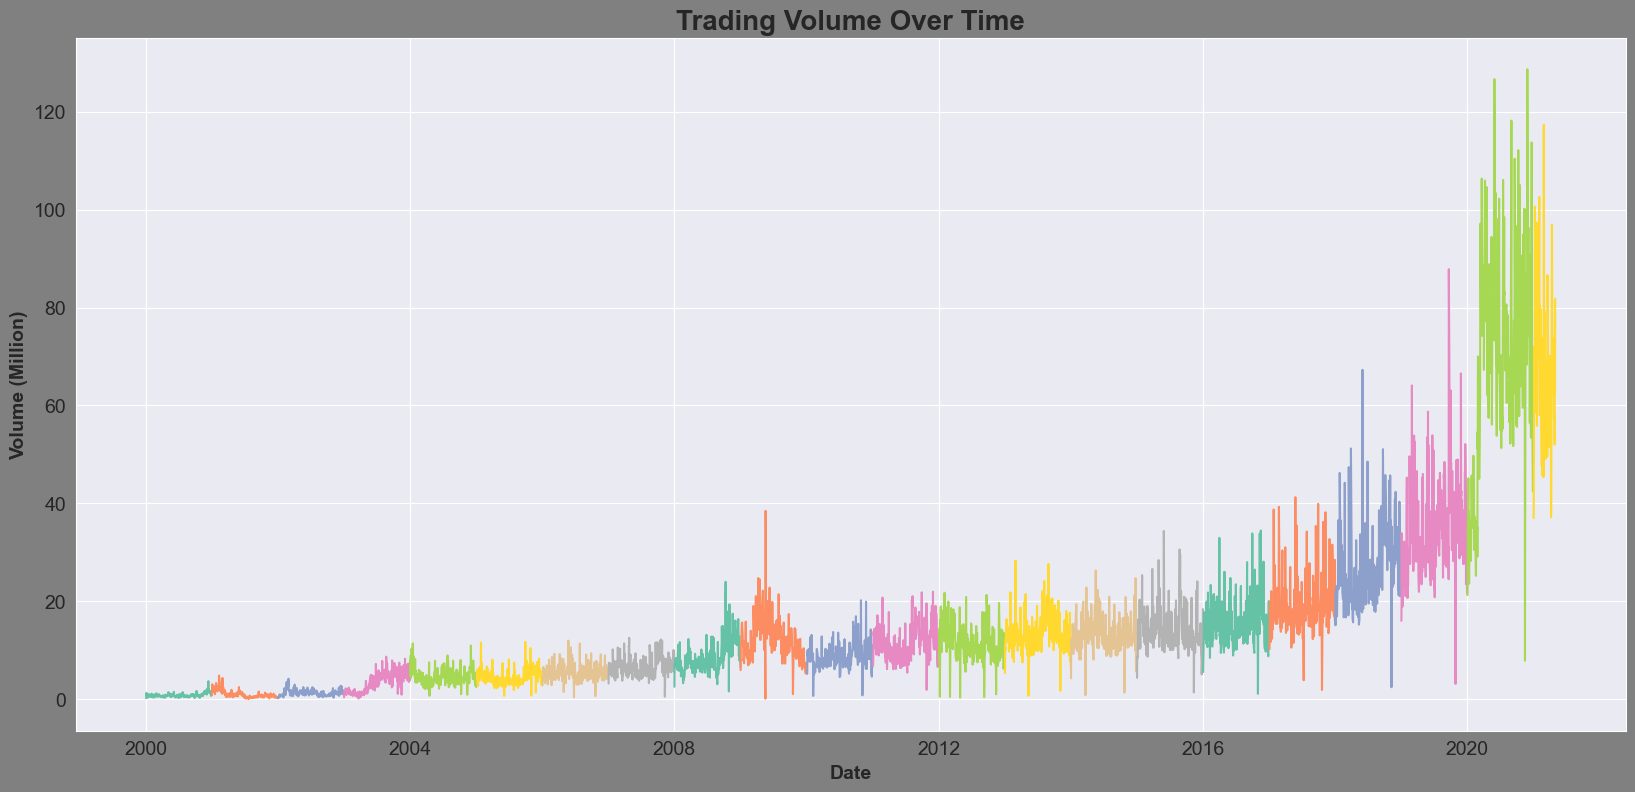

In [ ]:
volume_per = df.groupby('Date')['Volume'].median().reset_index()
volume_per['Volume'] = volume_per['Volume'] / 100000
plt.figure(figsize=(20, 9))
sns.lineplot(volume_per, x='Date', y='Volume', hue=volume_per['Date'].dt.strftime("%Y"), palette='Set2', legend=False)
plt.xlabel("Date", fontweight='bold')
plt.ylabel("Volume (Million)", fontweight='bold')
plt.title("Trading Volume Over Time", fontweight='bold', fontsize=20)
plt.show()

## Any days with huge turnover (₹ value of trades)?

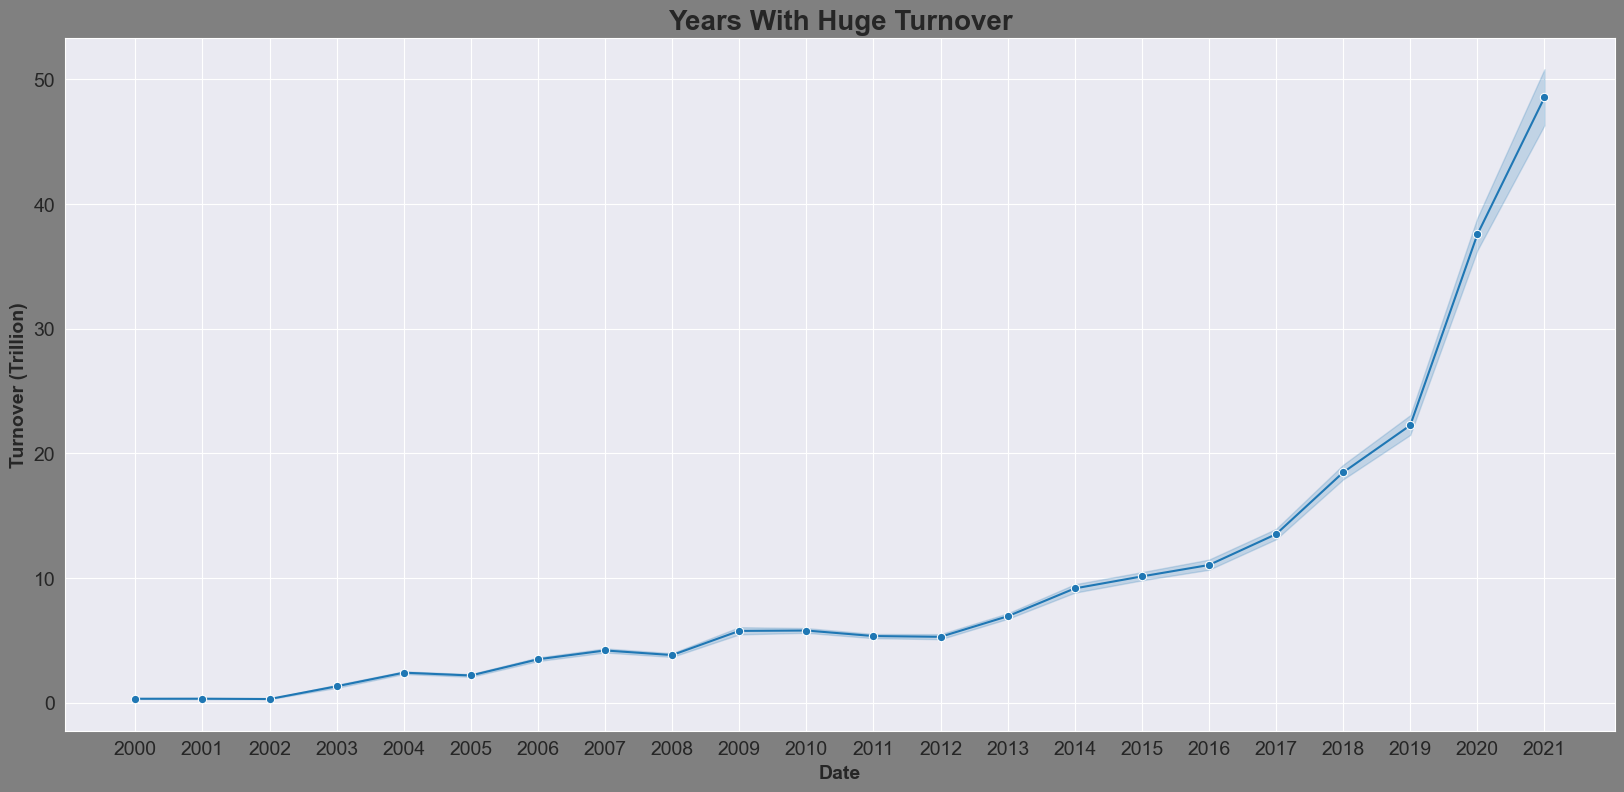

In [ ]:
turnover = df.groupby('Date')['Turnover'].median().reset_index()
turnover['Turnover'] = turnover['Turnover'] / 10000000000000
turnover
plt.figure(figsize=(20, 9))
line = sns.lineplot(turnover, x=turnover['Date'].dt.strftime("%Y"), y="Turnover", marker='o')
# plt.xticks(rotation=45)
plt.ylabel("Turnover (Trillion)", fontweight='bold')
plt.xlabel("Date", fontweight='bold')
plt.title("Years With Huge Turnover", fontweight='bold', fontsize=20)
plt.show()

## How does VWAP comapre to closing price over time?

In [ ]:
df.head()

,Date,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,ADANIPORTS,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366.0,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,ADANIPORTS,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338.0,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,ADANIPORTS,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121.0,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,ADANIPORTS,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762.0,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,ADANIPORTS,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470.0,2.875200e+14,NaN,816123.0,0.2741


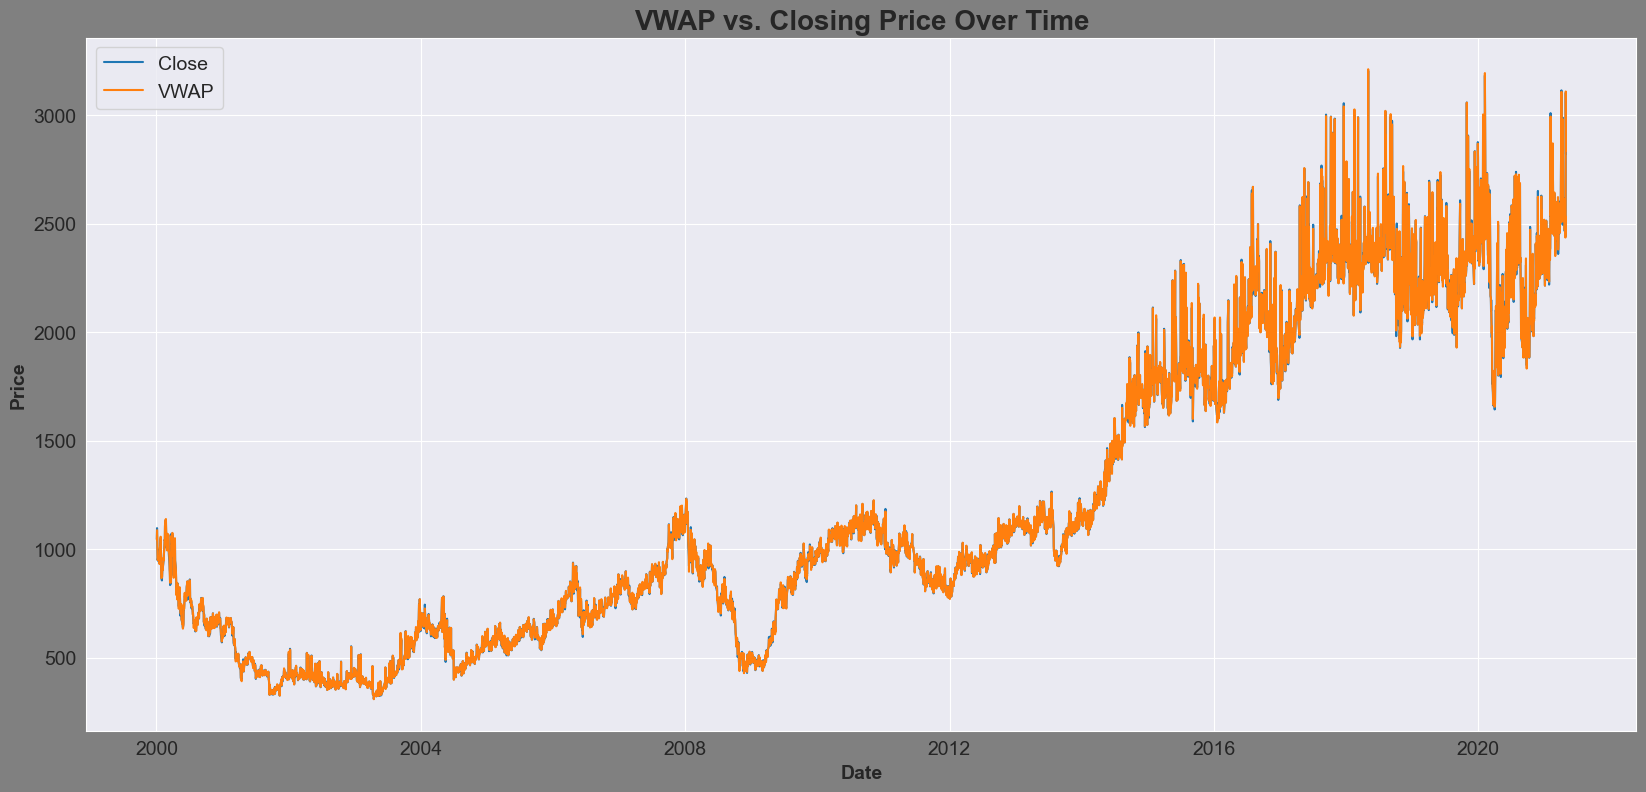

In [ ]:
close_vwap = df.groupby('Date')[['Close', 'VWAP']].mean()
plt.figure(figsize=(20, 9))
sns.lineplot(close_vwap, x=close_vwap.index, y='Close', label='Close')
sns.lineplot(close_vwap, x=close_vwap.index, y='VWAP', label='VWAP')
plt.title("VWAP vs. Closing Price Over Time", fontweight='bold', fontsize=20)
plt.xlabel("Date", fontweight='bold')
plt.ylabel("Price", fontweight='bold')
plt.show()

# I never wrote any insight on this chart due to it large scale and it's not clear.

# Distribution & Patterns
## Which price values (Open, High, Low, Close) show the most fluctuation?

In [ ]:
df.head()

,Date,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,ADANIPORTS,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366.0,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,ADANIPORTS,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338.0,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,ADANIPORTS,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121.0,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,ADANIPORTS,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762.0,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,ADANIPORTS,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470.0,2.875200e+14,NaN,816123.0,0.2741


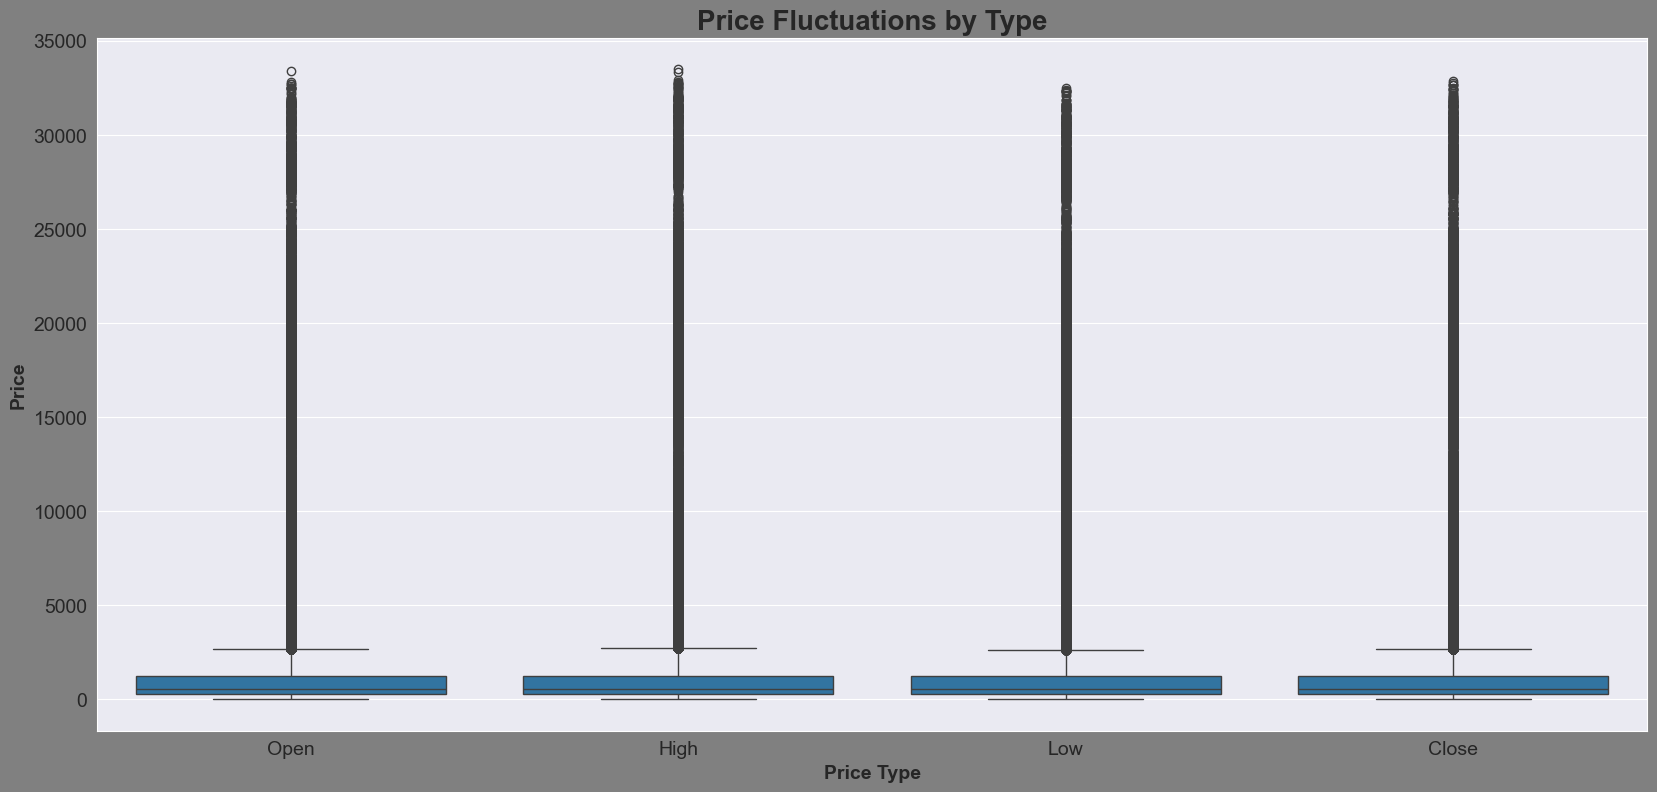

In [ ]:
df_melted = df.melt(id_vars=['Date', 'Symbol'], 
                    value_vars=['Open', 'High', 'Low', 'Close'],
                    var_name='Price Type',
                    value_name='Price')
plt.figure(figsize=(20, 9))
sns.boxplot(df_melted, x='Price Type', y='Price')
plt.title("Price Fluctuations by Type", fontweight='bold', fontsize=20)
plt.xlabel("Price Type", fontweight='bold')
plt.ylabel("Price", fontweight='bold')
plt.show()

## What's the distribution of % Deliverable?

In [ ]:
df.head()

,Date,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,ADANIPORTS,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366.0,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,ADANIPORTS,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338.0,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,ADANIPORTS,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121.0,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,ADANIPORTS,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762.0,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,ADANIPORTS,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470.0,2.875200e+14,NaN,816123.0,0.2741


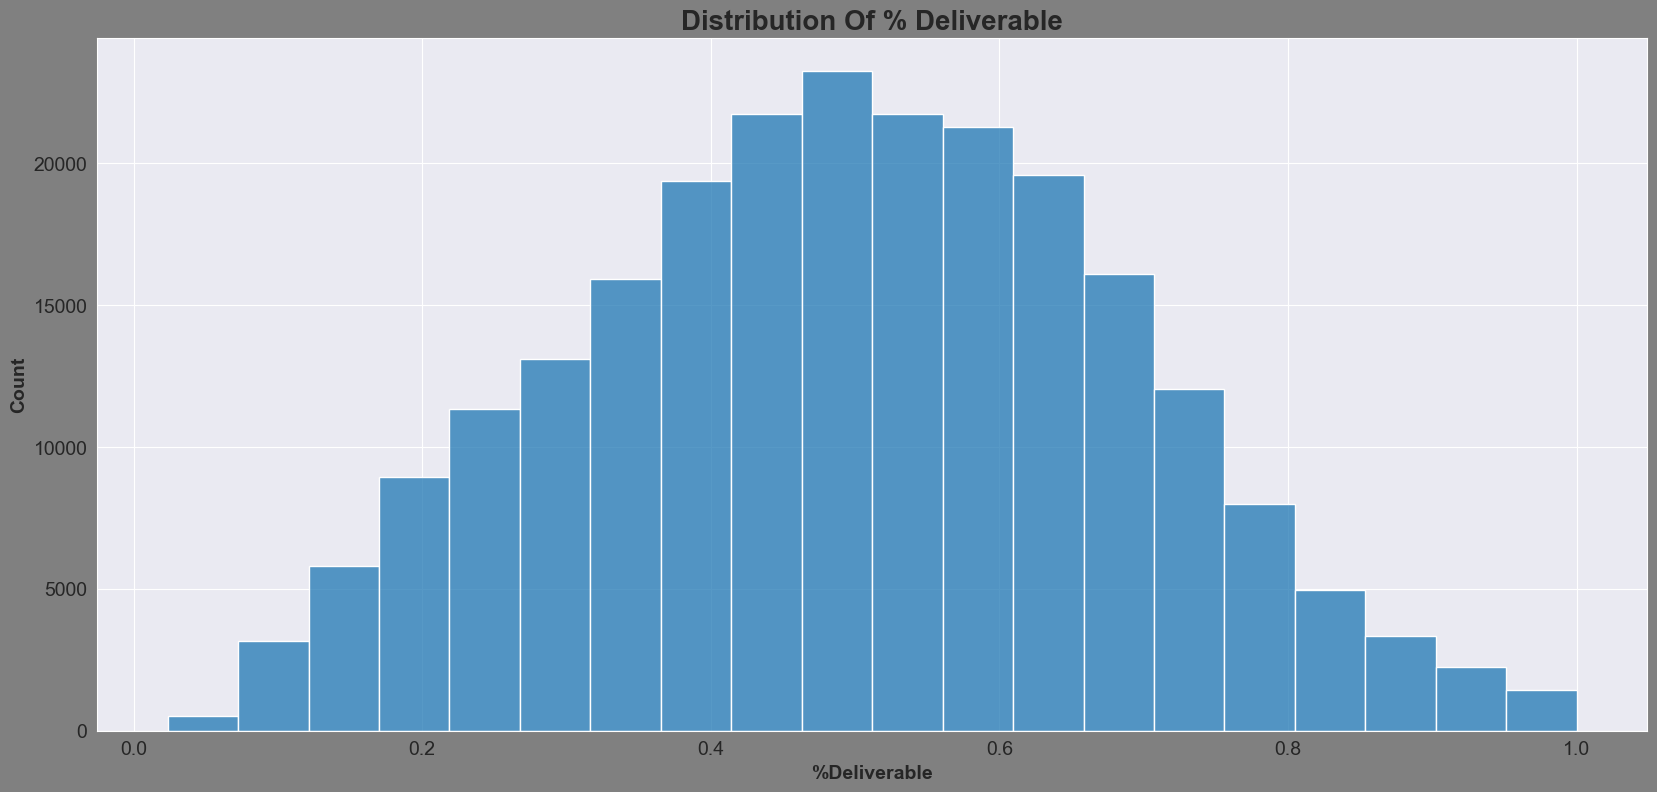

In [ ]:
# distribution of % Deliverable
plt.figure(figsize=(20, 9))
sns.histplot(df, x='%Deliverble', bins=20)
plt.title("Distribution Of % Deliverable", fontweight='bold', fontsize=20)
plt.xlabel("%Deliverable", fontweight='bold')
plt.ylabel("Count", fontweight='bold')
plt.show()

# Insights & Correlation
## Does high volume mean high volatility?

## Is there a pattern between volume and turnover?

In [ ]:
df.head()

,Date,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Volatility
0,2007-11-27,ADANIPORTS,440.00,770.00,770.0,770.0,959.0,962.90,984.72,27294366.0,2.687719e+15,NaN,9859619.0,0.3612,0.0
1,2007-11-28,ADANIPORTS,962.90,984.00,874.0,874.0,885.0,893.90,941.38,4581338.0,4.312765e+14,NaN,1453278.0,0.3172,0.0
2,2007-11-29,ADANIPORTS,893.90,909.00,841.0,841.0,887.0,884.20,888.09,5124121.0,4.550658e+14,NaN,1069678.0,0.2088,0.0
3,2007-11-30,ADANIPORTS,884.20,890.00,890.0,890.0,929.0,921.55,929.17,4609762.0,4.283257e+14,NaN,1260913.0,0.2735,0.0
4,2007-12-03,ADANIPORTS,921.55,939.75,922.0,922.0,980.0,969.30,965.65,2977470.0,2.875200e+14,NaN,816123.0,0.2741,0.0


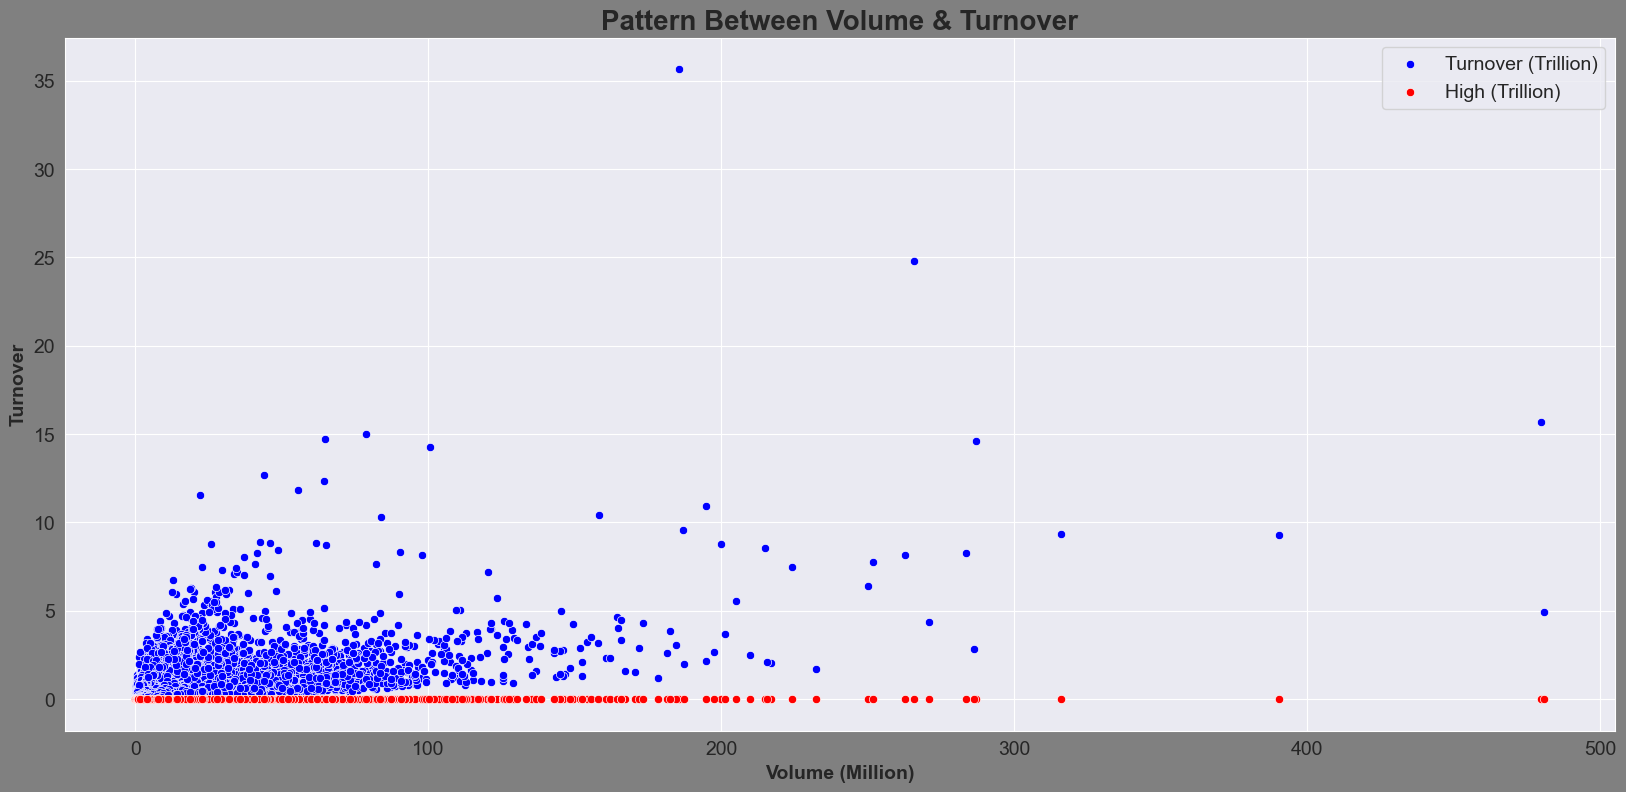

In [ ]:
# pattern between volume and turnover

plt.figure(figsize=(20, 9))
sns.scatterplot(data=df, x=df["Volume"]/1000000, y=df["Turnover"]/1000000000000000, color="blue", label="Turnover (Trillion)")
sns.scatterplot(data=df, x=df["Volume"]/1000000, y=df["High"]/1000000000000000, color="red", label="High (Trillion)")
plt.title("Pattern Between Volume & Turnover", fontweight='bold', fontsize=20)
plt.xlabel("Volume (Million)", fontweight='bold')
plt.ylabel("Turnover", fontweight='bold')
plt.legend()
plt.show()

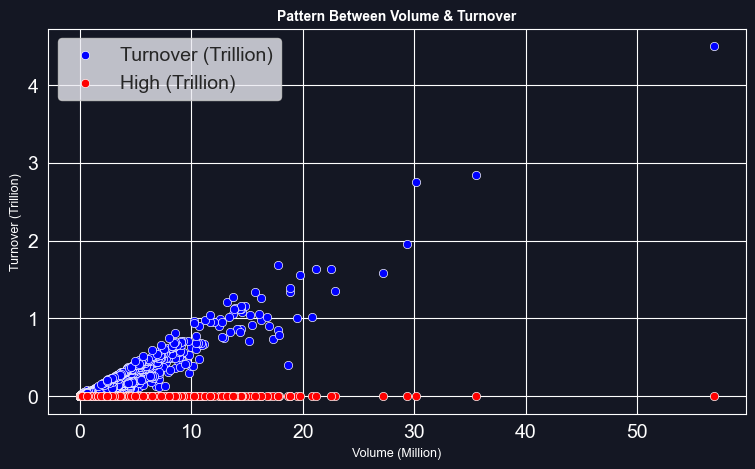

In [3]:
# df.to_csv("stock_market_data/clean_data/stock_market.csv", index=False)

fig, axes = plt.subplots()
sns.scatterplot(data=df, x=df["Volume"]/1000000, y=df["Turnover"]/1000000000000000, color="blue", label="Turnover (Trillion)", ax=axes)
sns.scatterplot(data=df, x=df["Volume"]/1000000, y=df["High"]/1000000000000000, color="red", label="High (Trillion)", ax=axes)
plt.title("Pattern Between Volume & Turnover", fontweight='bold', fontsize=10)
plt.xlabel("Volume (Million)", fontsize=9)
plt.ylabel("Turnover (Trillion)", fontsize=9)
fig.patch.set_facecolor(color='#141723')
axes.set_facecolor('#141723')
# type: ignore
axes.xaxis.label.set_color('white')
axes.yaxis.label.set_color('white')
axes.title.set_color('white')
axes.tick_params(colors='white')